In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("births.csv")
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


### Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.

In [3]:
df['decade'] = (df['year'] // 10) * 10
df.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [4]:
df.tail()

,year,month,day,gender,births,decade
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000
15546,2008,12,NaN,M,181235,2000


### Q.2: Show the descriptive statistics of the data.

In [7]:
df.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


###  Q.3: Check if your data contains any missing values

In [8]:
df.isnull().sum(axis=0) # we found the 480 missing values in day column 

year        0
month       0
day       480
gender      0
births      0
decade      0
dtype: int64

### Q.4: What is the trend of male & female births every decade?

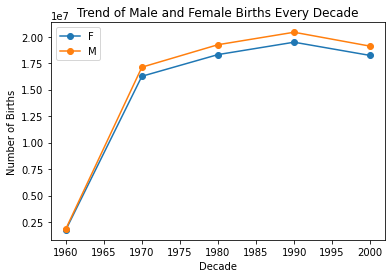

In [9]:
# Group the data by decade and gender, and calculate the total number of births
trend = df.groupby(['decade', 'gender'])['births'].sum().unstack()

# Plot the trend of male and female births every decade
trend.plot(kind='line', marker='o')

# Set the plot title and labels
plt.title('Trend of Male and Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Births')

# Show the legend
plt.legend()

# Display the plot
plt.show()

### Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean.This is a common statistical technique used to focus on the central tendency of the data while excluding extreme values. Use this technique to remove outliers.

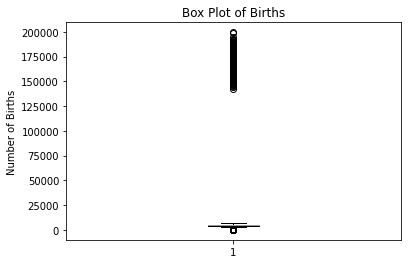

In [5]:
# Create a box plot of the 'births' column
plt.boxplot(df['births'])

# Set the plot title and labels
plt.title('Box Plot of Births')
plt.ylabel('Number of Births')

# Display the plot
plt.show()

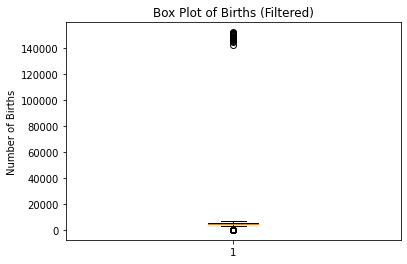

In [6]:
# Calculate the mean and standard deviation
mean = df['births'].mean()
std = df['births'].std()

# Define the lower and upper bounds for outlier removal
lower_bound = mean - (5 * std)
upper_bound = mean + (5 * std)

# Filter the DataFrame to include only values within the defined bounds
df_filtered = df[(df['births'] >= lower_bound) & (df['births'] <= upper_bound)]

# Create a box plot of the 'births' column after filtering
plt.boxplot(df_filtered['births'])

# Set the plot title and labels
plt.title('Box Plot of Births (Filtered)')
plt.ylabel('Number of Births')

# Display the plot
plt.show()

To check for outliers in the given columns, it is important to understand the nature of the data in each column. Outliers are typically identified in numerical columns, so it would be more appropriate to focus on columns like 'births' outlier detection.

###  Q.6: Plot births by weekday for several decades. Write down your observation.

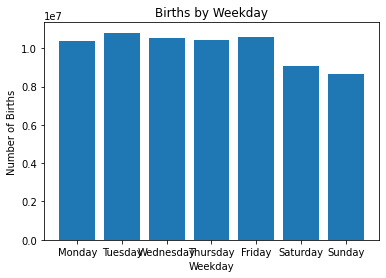

In [11]:
# Convert the year, month, and day columns to a pandas datetime format
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# Calculate the weekday for each birth entry (0 = Monday, 6 = Sunday)
df['weekday'] = df['date'].dt.weekday

# Group the births by weekday and count the number of births for each weekday
births_by_weekday = df.groupby('weekday')['births'].sum()

# Plot the births by weekday
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.bar(weekdays, births_by_weekday)
plt.xlabel('Weekday')
plt.ylabel('Number of Births')
plt.title('Births by Weekday')
plt.show()

### Q.7: Group the data by month and day separately

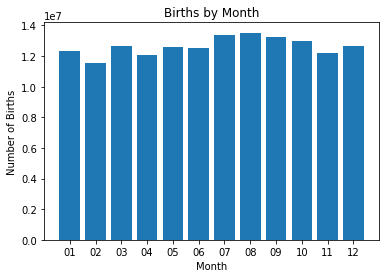

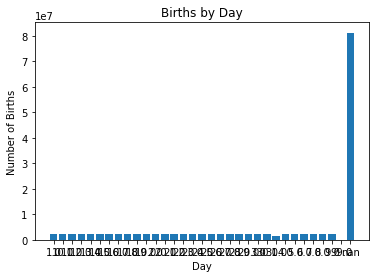

In [45]:
# Convert the year, month, and day columns to a pandas datetime format
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# Group the births by month and calculate the number of births for each month
births_by_month = df.groupby('month')['births'].sum()

# Group the births by day and calculate the number of births for each day
births_by_day = df.groupby('day')['births'].sum()

# Plot the births by month
plt.bar(births_by_month.index, births_by_month)
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.title('Births by Month')
plt.show()

# Plot the births by day
plt.bar(births_by_day.index, births_by_day)
plt.xlabel('Day')
plt.ylabel('Number of Births')
plt.title('Births by Day')
plt.show()

### Q.8: Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data.

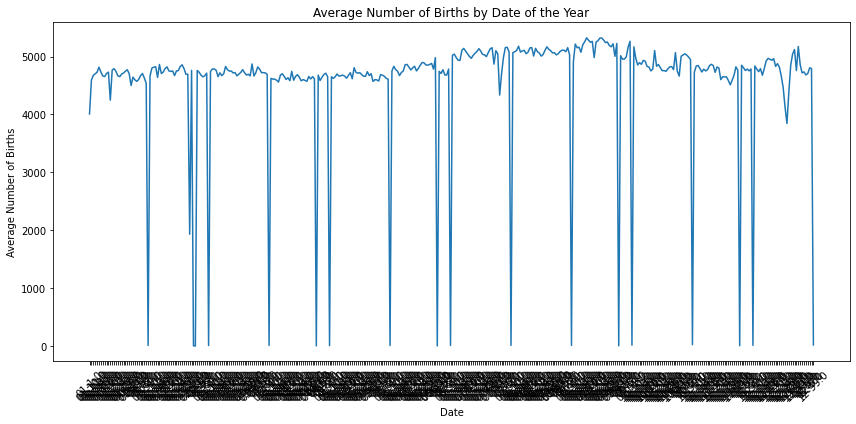

In [63]:
# Group the data by month and day, and calculate the average births
average_births = df.groupby(['month', 'day'])['births'].mean()

# Convert the grouped data into a DataFrame
df = pd.DataFrame(average_births).reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['births'])
plt.xlabel('Date')
plt.ylabel('Average Number of Births')
plt.title('Average Number of Births by Date of the Year')
plt.xticks(df.index, df['month'].astype(str) + '-' + df['day'].astype(str), rotation=45)
plt.tight_layout()
plt.show()